# EDA



Анализ данных из датасета train.csv

Вопросы, на которые необходимо ответить: 

Необходимо провести разведочный анализ данных (EDA) и ответить на следующие вопросы:
-	Какие основные статистические характеристики данных (среднее, медиана, стандартное отклонение и т.д.)?
-	Есть ли в данных пропуски? Если да, предложите способы их обработки.
-	Постройте визуализации для основных переменных, чтобы понять их распределение и взаимосвязи.

Ожидаемые результаты:
-	Выводы по структуре и основным характеристикам данных.
-	Графики (гистограммы, диаграммы рассеяния, корреляционные матрицы и т.д.).
-	Описание подхода к обработке пропусков, если такие имеются.


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('data/train.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

Данный датасет представляет собой данные об участах леса, содержащий следующую информацию:

0: Id - Номер участка</br>
1: Elevation - Высота над уровнем моря в метрах</br>
2: Aspect - Направление в градусах по азимуту</br>
3: Slope - Уклон в градусах</br>
4: Horizontal_Distance_To_Hydrology - Горизонтальное расстояние до ближайших объектов поверхностных вод</br>
5: Vertical_Distance_To_Hydrology - Расстояние до ближайших объектов с поверхностными водоемами</br>
6: Horizontal_Distance_To_Roadways - Расстояние от горы до ближайшей проезжей части</br>
7 - 9: Hillshade - Индекс затенения холмов в (9 утра, полдень, 3 часа дня) в день летнего солнцестояния</br>
10: Horizontal_Distance_To_Fire_Points - Расстояние от горы до ближайших точек возгорания</br>
11 - 14: Wilderness_Area - обозначение дикой местности (0 = отсутствие или 1 = наличие)</br>
15 - 54: Soil_Type - Обозначение типа почвы (0 = отсутствие или 1 = наличие)</br>
55: Cover_Type - Обозначение типа лесного покрова(7 типов, целые числа от 1 до 7)</br>

Следующие блок кода предназначен для преобразования таблицы в более удобный вид. 4 бинарный столбца Wilderness_Area и 40 Soil_Type имеют определённое свойство - только 1 столбец из 4 или 40 содержит единицу. Следовательно можно преобразовать его в 2 столбка содержащие только номер этого столбца.

In [41]:
# data_ будет содержать стобцы с номерами столбцов из старой таблицы с единицами
data_ = data

# вспомогательный массив для хранения номеров
a = []

# стурктура для получения номеров столбцов с единицами
for i in range(len(data)):
    for x in range(1, 5):
        if data["Wilderness_Area" + str(x)][i]:
            a.append(x)

# удаление всех бинарных столбцов
for x in range(1, 5):
    data_ = data_.drop("Wilderness_Area" + str(x), axis=1)

# добавление одного столбца с номерами 
data_['Wilderness_Area'] = a


# вторая аналогичная часть для Soil_Type
a.clear()
for i in range(len(data)):
    for x in range(1, 41):
        if data["Soil_Type" + str(x)][i]:
            a.append(x)

for x in range(1, 41):
    data_ = data_.drop("Soil_Type" + str(x), axis=1)

data_['Soil_Type'] = a

data_.iloc[:,1:].describe().iloc[1:]



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,4.000000,2.800397,19.171362
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,2.000066,1.119832,12.626960
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,2.000000,2.000000,10.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,4.000000,3.000000,17.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,6.000000,4.000000,30.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,7.000000,4.000000,40.000000


In [42]:
print(data_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Cover_Type                          15120 non-null  int64
 12  Wild

Далее представлены три графика, показывающие количество строк по 3 характеристикам: Wilderness_Area, Cover_Type и Cover_Type.

Из графиков можно получить следующую информацию:
1. 3 тип Wilderness_Area является самым распространённым 
2. все 7 типов Cover_Type имеют одинаковое значение, что может говорить о том, что данные являются либо хорошо подобранными, либо искуственными.
3. 10 тип Soil_Type является самым распространённым, так же есть типы которые практически не представленны в таблице. 

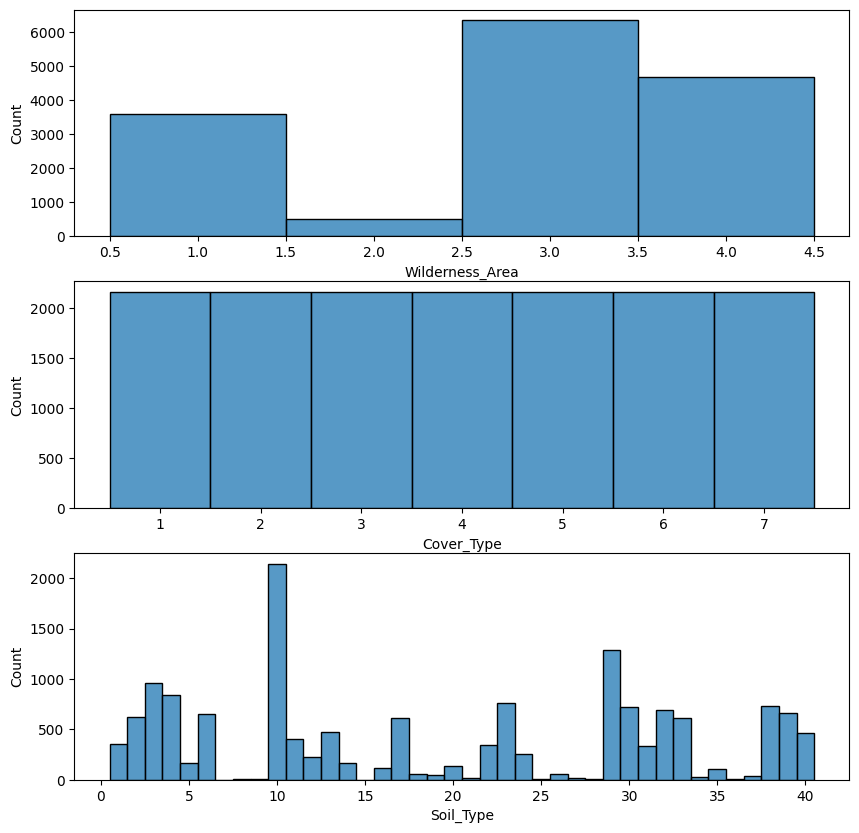

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
sns.histplot(data=data_, x='Wilderness_Area',ax=axs[0],discrete=True)
sns.histplot(data=data_, x='Cover_Type',ax=axs[1], discrete=True)
sns.histplot(data=data_, x='Soil_Type',ax=axs[2],discrete=True)

plt.show()

Далее представленны аналогичные графики по каждому столбцу таблицы

На этих графиках видны самые распространённые типы по каждому столбцу.


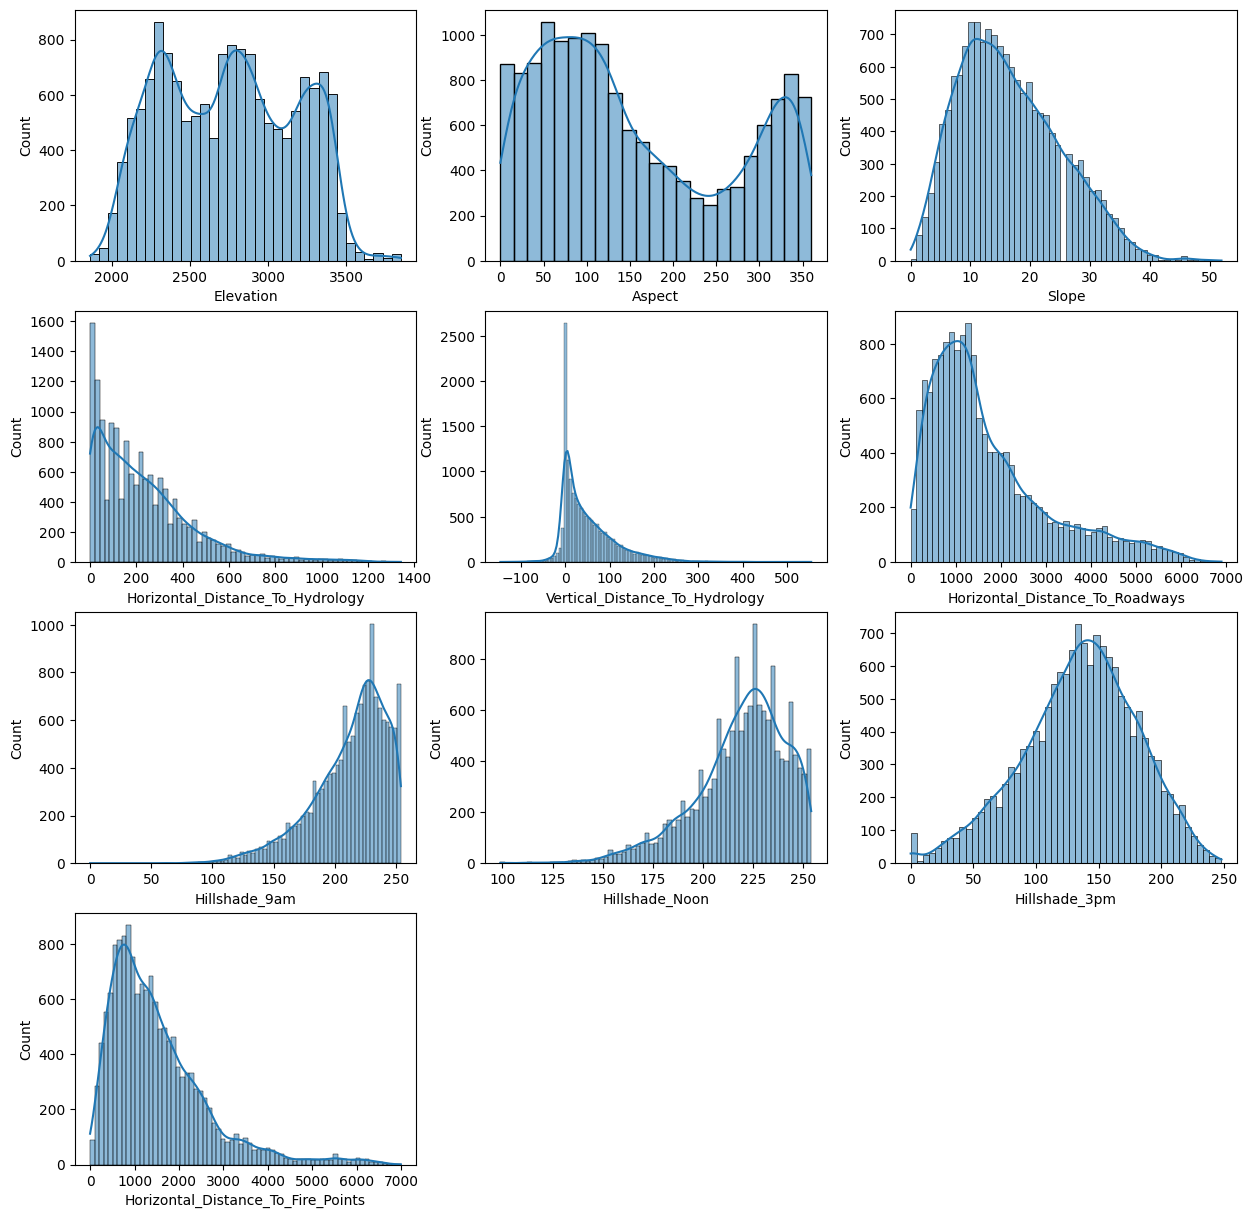

In [44]:
fig, axs = plt.subplots(4, 3, figsize=(15,15))
sns.histplot(data=data_, x='Elevation', kde = True,ax=axs[0][0])
sns.histplot(data=data_, x='Aspect', kde = True,ax=axs[0][1])
sns.histplot(data=data_, x='Slope', kde = True,ax=axs[0][2])
sns.histplot(data=data_, x='Horizontal_Distance_To_Hydrology', kde = True,ax=axs[1][0])
sns.histplot(data=data_, x='Vertical_Distance_To_Hydrology', kde = True,ax=axs[1][1])
sns.histplot(data=data_, x='Horizontal_Distance_To_Roadways', kde = True,ax=axs[1][2])
sns.histplot(data=data_, x='Hillshade_9am', kde = True,ax=axs[2][0])
sns.histplot(data=data_, x='Hillshade_Noon', kde = True,ax=axs[2][1])
sns.histplot(data=data_, x='Hillshade_3pm', kde = True,ax=axs[2][2])
sns.histplot(data=data_, x='Horizontal_Distance_To_Fire_Points', kde = True,ax=axs[3][0])
axs[3][1].remove()
axs[3][2].remove()


Далее представлена тепловая карта, содержащая коэффициенты корреляции всех пар столбцов.

На ней видно, какие столбы имеют линейную зависимость, а какие нет.

Elevation по данной карте имеет самые большие значение корреляции по отношению с остальными столбцами, что может говорить о том, что многие значения зависят от Elevation.  

Cover_Type является самой низкозависимой от остальных данных, что может указывать, что это значение не имеет прямой линейной зависимости от этих данных и не может быть предсказано с помощию линейной регрессии.

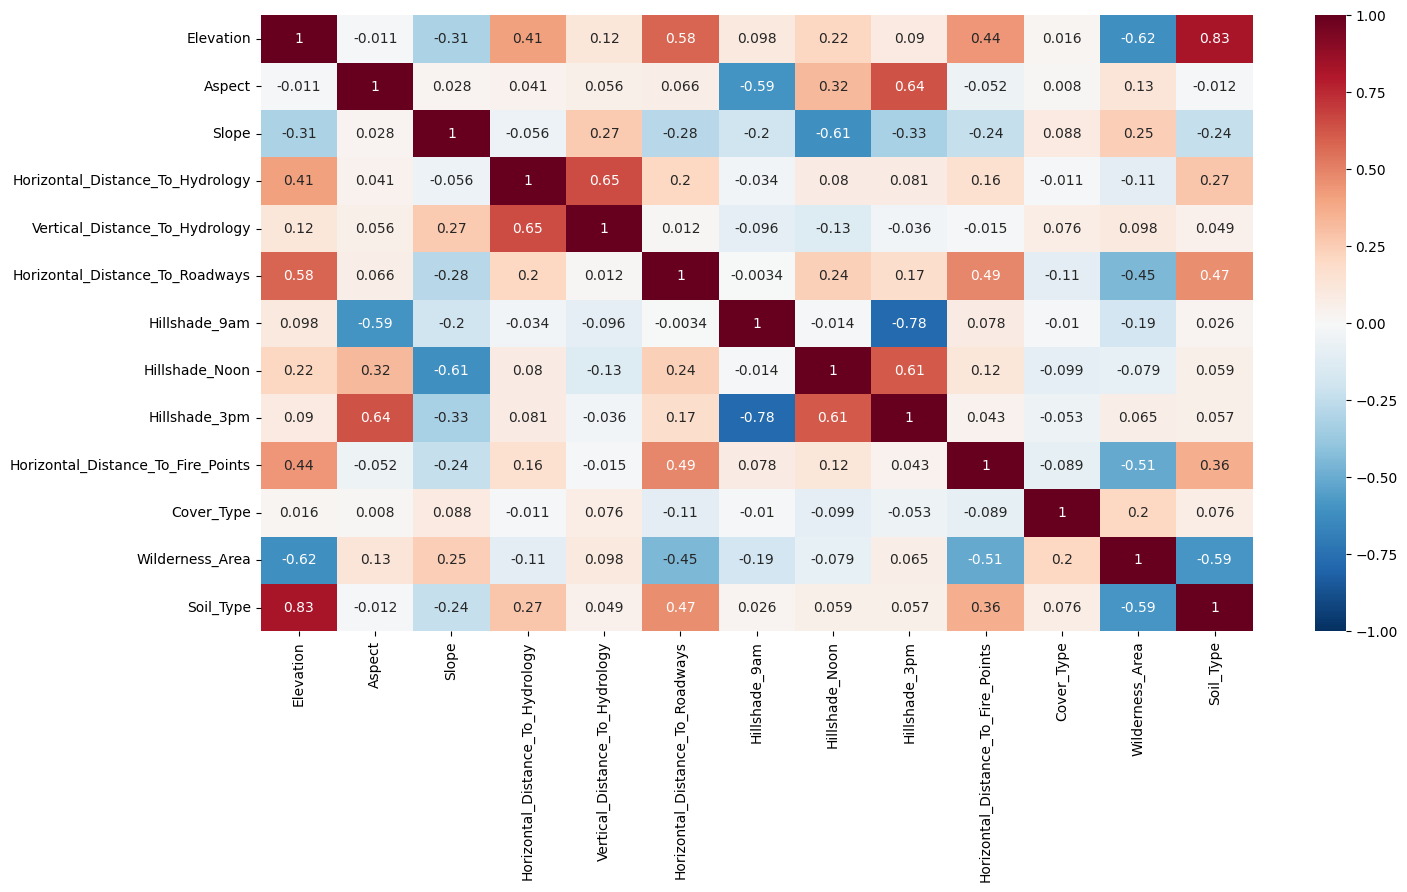

In [45]:
plt.figure(figsize=(16,8))
sns.heatmap(
    data_.iloc[:,1:].corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

Следующие графики показывают зависимость высоты (Elevation), типа почвы (Soil_Type), типа дикой природы (Wilderness_Type) и тип покрытия (Cover_Type)

Из графиков видно, как взаимосвязанны эти данные и как можно по высоте и типу почвы примерно определить некоторые типы покрытия. Так например если поверхность находится на небольшой высоте, имеет 4 тип дикой природы и примерно 1-10 тип почвы то с большой вероятностью это будет 3 или 4 тип покрытия, так как только на этом типе встречаются такие характеристики.

Так же можно заметить, что 5 тип поверхности имеет уровень высоты примерно от 2500 до 3000, что значит возможность отсеивать данный вариант в противном случае.

Так же можно заметить наличие небольших выбросов практически на каждом типе поверхности.

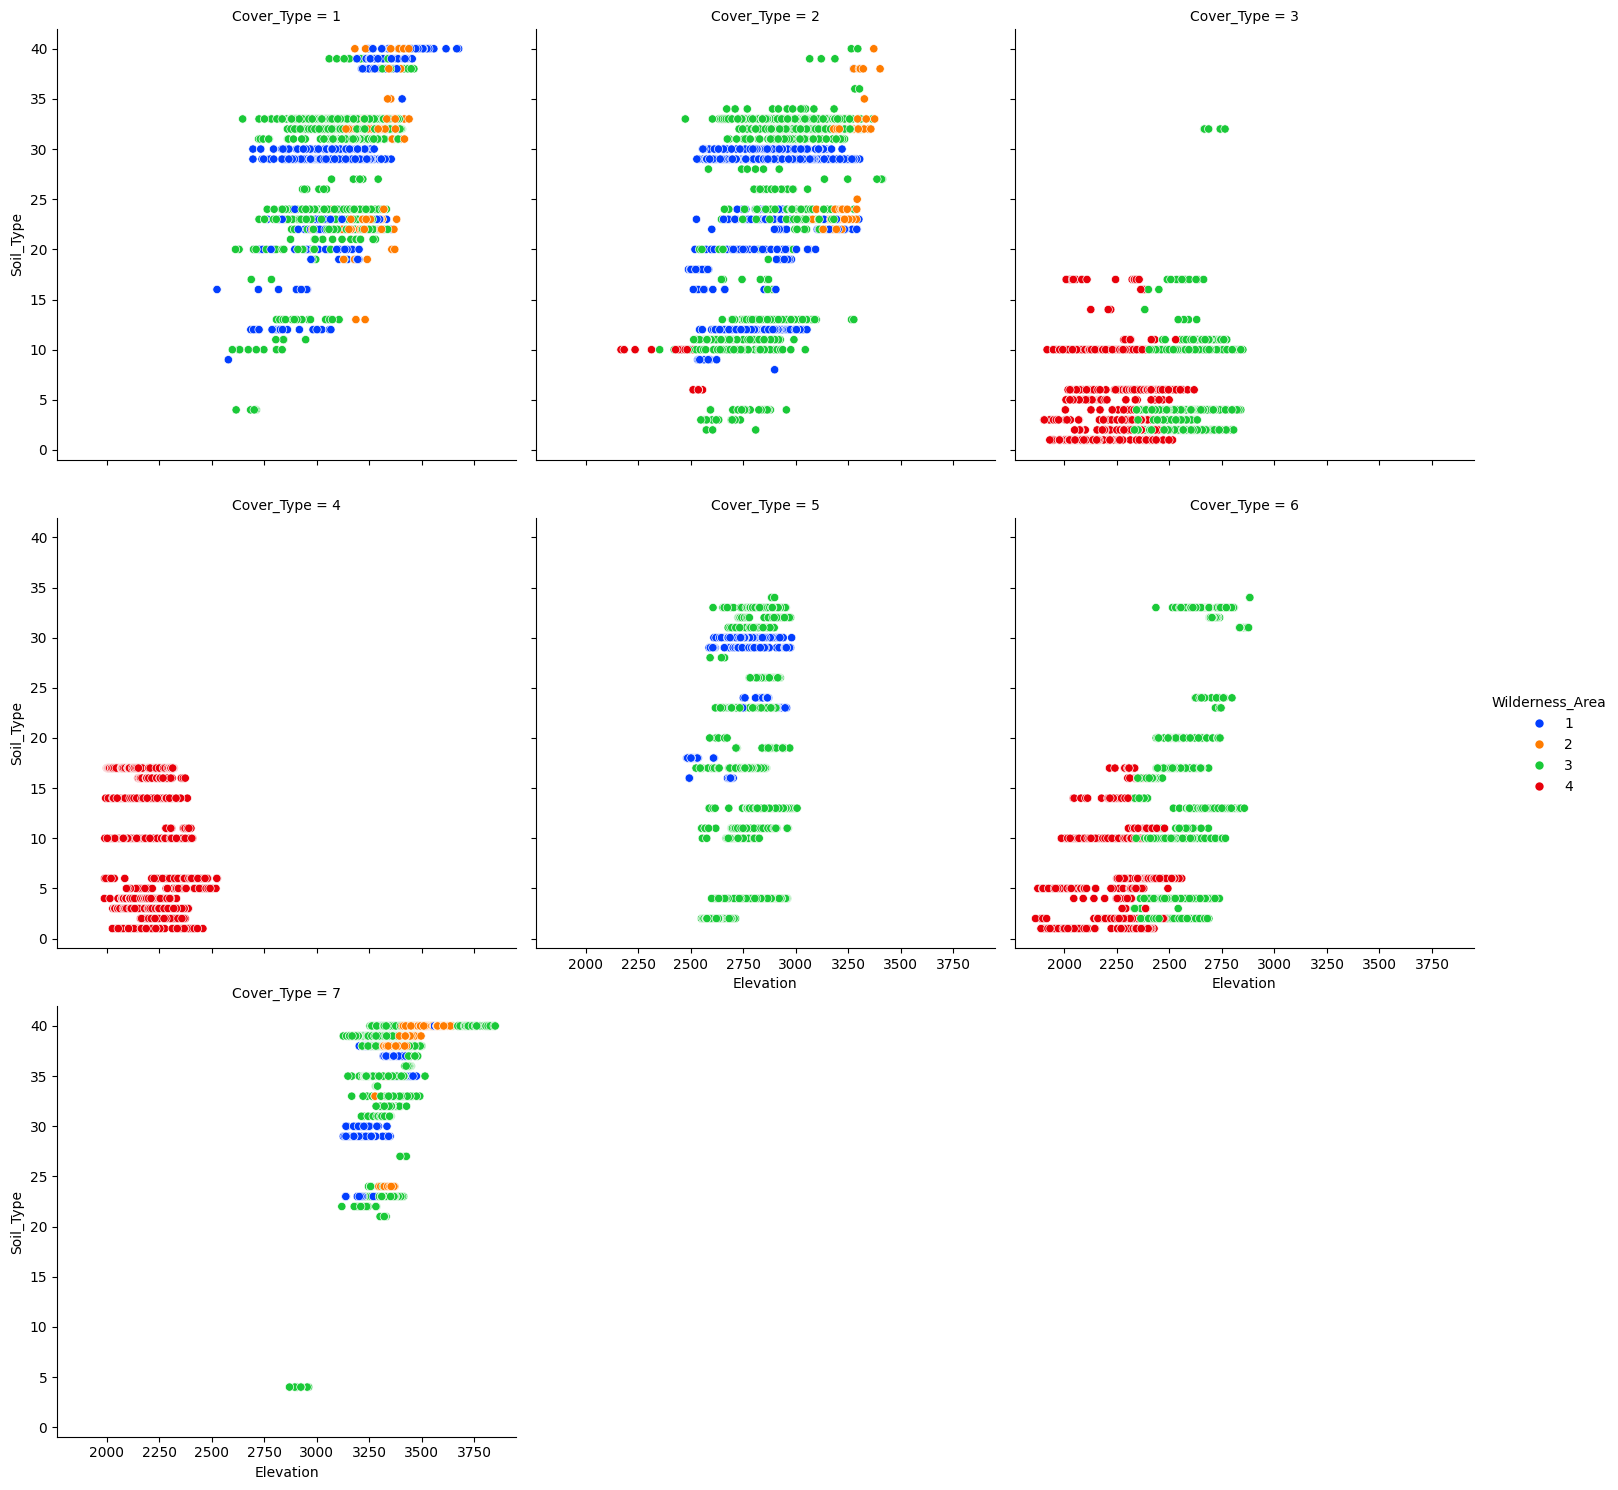

In [ ]:
sns.relplot(data=data_, x='Elevation', y='Soil_Type', hue='Wilderness_Area',
            col_wrap=3, col='Cover_Type', palette='bright', kind='scatter')


----------------------------

## Ответим на основные вопросы.



### Какие основные статистические характеристики данных (среднее, медиана, стандартное отклонение и т.д.)?

In [48]:
data_.iloc[:,1:].describe().iloc[1:]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,4.000000,2.800397,19.171362
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,2.000066,1.119832,12.626960
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,2.000000,2.000000,10.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,4.000000,3.000000,17.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,6.000000,4.000000,30.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,7.000000,4.000000,40.000000


Данная талица представляет основные статистичекие характеристики данных, такие как среднее (mean), 
стандартное отклонение (std), минимальное значение (min), 1-й квартиль (25%), медиана (50%), 
3-й квартиль (75%) и максимальное значение (max).

### Есть ли в данных пропуски? Если да, предложите способы их обработки

В данных нет пропусков и все значение являются полными. 

Если бы в данных были пропуски, то вот несколько вариантов их решения.

- Удалить данные с пустыми значениями. Данный способ является достаточно радикальным, в следтвии чего при большом количестве пропусков могут быть потеряны данные.
- Заменить на среднее или медиану. Данный способ может быть использован, если нет возможности удалять данные.
- Заполнить пустые значенияна основе прогноза ML модели. Является более сложным способом, так как в случае маленького количества данных может быть неэффективен. ML модель должна строиться на основе полной данных, поэтому если есть не один столбец с пропущенными данными, то необходимо использовать один из первых двух способов.




### Постройте визуализации для основных переменных, чтобы понять их распределение и взаимосвязи.

Основные графики были построены выше.